In [1]:
import urllib.request
import os

# we use this method because it'll automatically dected the operating system and how the archives are structured
datapath = os.path.join("datasets", "lifesat", "")

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("gdp_per_capita.csv", "oecd_bli_2015.csv"):
    print(f"Downloading {filename}...")
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

# Pivot

Here we use `.pivot` pandas's method to make a table from the data, where the indexes are the contries, the columns the indicators and the value the value in question. 

In [2]:
def prepare_contry_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    
    #Definindo o índice como o país
    gdp_per_capita.set_index("Country", inplace=True)
    
    #Juntando os dois dataframos num só
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index = True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    display(full_country_stats[["GDP per capita", "Life satisfaction"]].head())
    # removing outliers (brazil is index 0)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


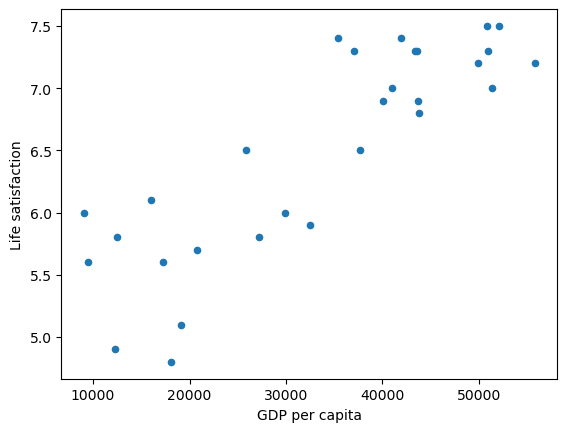

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

oecd = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=",")
gdp = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                 encoding='latin1', na_values="n/a")


country_stats = prepare_contry_stats(oecd, gdp)

# np.c_[] is a shorthand for setting the data in a sklearn way
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [4]:
import sklearn.linear_model

#Choose the model
model = sklearn.linear_model.LinearRegression()

#Train the model
model.fit(X, y)

#Make prediction for Brazil
X_new = [[8669.998]] #Cyprus GDP per capita
print(f"Life Satisfaction: {model.predict(X_new)[0][0]}")

Life Satisfaction: 5.278883617915584


[[4.91154459e-05]] [4.8530528]


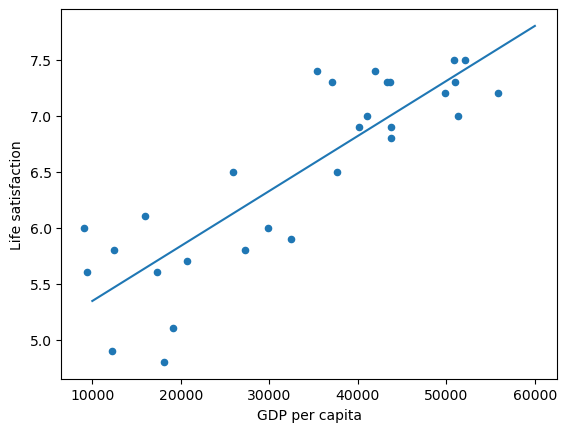

In [5]:
print(model.coef_, model.intercept_)

x = np.linspace(10000, 60000, 100)
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.plot(x, model.coef_[0][0]*x + model.intercept_[0])
plt.show()

In [6]:
import sklearn.neighbors

#Choose the model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

#Train the model
model.fit(X, y)

#Make prediction for Brazil
X_new = [[8669.998]] #Cyprus GDP per capita
print(f"Life Satisfaction: {model.predict(X_new)[0][0]}")

Life Satisfaction: 5.5


Brazil is an outlier, thus it cannot predict it very well